In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/football/players_20.csv")

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
df.shape

(18278, 104)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [ ]:
df_missing = df.isna()
df_missing
df_missingsum = df_missing.sum()
df_missingsum
(df_missingsum/len(df))*100
df.isna().mean().round(4)*100

sofifa_id      0.00
player_url     0.00
short_name     0.00
long_name      0.00
age            0.00
              ...  
lb            11.14
lcb           11.14
cb            11.14
rcb           11.14
rb            11.14
Length: 104, dtype: float64

In [ ]:
df.drop(df.columns[43:],axis=1,inplace=True)
df.drop(df.columns[20:24],axis=1,inplace=True)
df.drop(df.columns[22:24],axis=1,inplace=True)
df.drop(df.columns[11:14],axis=1,inplace=True)
df.drop(df.columns[5:7],axis=1,inplace=True)
df.drop(df.columns[3],axis=1,inplace=True)

In [ ]:
df.drop(['team_jersey_number','nation_jersey_number'],axis=1,inplace=True)
del df['player_url']
del df['contract_valid_until']

In [ ]:
df['gk_diving']=df.gk_diving.fillna(df.gk_diving.mean())
df['gk_handling']=df.gk_handling.fillna(df.gk_handling.mean())
df['gk_kicking']=df.gk_kicking.fillna(df.gk_kicking.mean())
df['gk_reflexes']=df.gk_reflexes.fillna(df.gk_reflexes.mean())
df['gk_speed']=df.gk_speed.fillna(df.gk_speed.mean())
df['gk_positioning']=df.gk_positioning.fillna(df.gk_positioning.mean())
df['pace']=df.pace.fillna(df.pace.mean())
df['shooting']=df.shooting.fillna(df.shooting.mean())
df['passing']=df.passing.fillna(df.passing.mean())
df['defending']=df.defending.fillna(df.defending.mean())
df['physic']=df.physic.fillna(df.physic.mean())
df['dribbling']=df.dribbling.fillna(df.dribbling.mean())

df['nation_position']=df.nation_position.fillna(df.nation_position.value_counts().index[0])
df['team_position']=df.team_position.fillna(df.team_position.value_counts().index[0])

In [ ]:
df.isnull().sum()

sofifa_id                   0
short_name                  0
age                         0
weight_kg                   0
nationality                 0
club                        0
overall                     0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
team_position               0
nation_position             0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
gk_diving                   0
gk_handling                 0
gk_kicking                  0
gk_reflexes                 0
gk_speed                    0
gk_positioning              0
dtype: int64

In [ ]:
df.head()

,sofifa_id,short_name,age,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,158023,L. Messi,32,72,Argentina,FC Barcelona,94,"RW, CF, ST",Left,5,4,4,Medium/Low,RW,SUB,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754
1,20801,Cristiano Ronaldo,34,83,Portugal,Juventus,93,"ST, LW",Right,5,4,5,High/Low,LW,LS,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754
2,190871,Neymar Jr,27,68,Brazil,Paris Saint-Germain,92,"LW, CAM",Right,5,5,5,High/Medium,CAM,LW,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754
3,200389,J. Oblak,26,87,Slovenia,Atlético Madrid,91,GK,Right,3,3,1,Medium/Medium,GK,GK,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000
4,183277,E. Hazard,28,74,Belgium,Real Madrid,91,"LW, CF",Right,4,4,4,High/Medium,LW,LF,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754


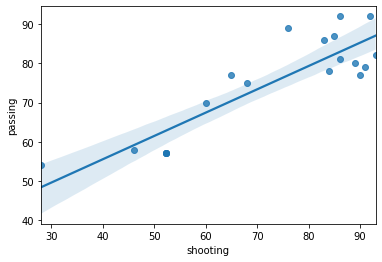

In [ ]:
sns.regplot(x='shooting', y='passing', data= df.head(20))
plt.show()

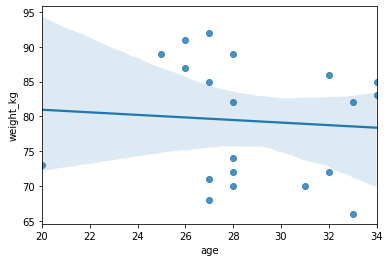

In [ ]:
sns.regplot(x='age', y='weight_kg', data= df.head(20))
plt.show()

In [ ]:
df.corr()

,sofifa_id,age,weight_kg,overall,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
sofifa_id,1.000000,-0.736680,-0.203620,-0.445061,-0.360765,-0.092250,-7.964529e-02,1.458338e-01,-2.467105e-01,-3.306229e-01,-1.998951e-01,-2.026141e-01,-3.333713e-01,-1.700643e-01,-1.781698e-01,-1.506137e-01,-1.624510e-01,-1.487126e-01,-2.057234e-01
age,-0.736680,1.000000,0.237169,0.464305,0.259582,0.073988,4.527734e-02,-1.850871e-01,2.198391e-01,3.040220e-01,1.489385e-01,2.391559e-01,4.004104e-01,1.654225e-01,1.796133e-01,1.558595e-01,1.612534e-01,1.301812e-01,2.118678e-01
weight_kg,-0.203620,0.237169,1.000000,0.156522,0.090854,-0.128568,-3.520595e-01,-3.465204e-01,-8.542843e-02,-1.635212e-01,-2.692335e-01,1.956328e-01,5.209128e-01,7.476624e-02,7.905562e-02,6.249361e-02,7.180976e-02,2.299359e-02,8.425207e-02
overall,-0.445061,0.464305,0.156522,1.000000,0.475557,0.230276,4.012614e-01,1.474359e-01,4.620607e-01,6.347467e-01,5.579364e-01,3.107051e-01,4.800028e-01,3.464135e-01,3.376930e-01,2.887301e-01,3.460157e-01,1.754686e-01,3.448969e-01
international_reputation,-0.360765,0.259582,0.090854,0.475557,1.000000,0.127792,1.996960e-01,4.098863e-03,2.603773e-01,3.370265e-01,2.814104e-01,1.315097e-01,1.677239e-01,1.370052e-01,1.425324e-01,1.143349e-01,1.349083e-01,7.294336e-02,1.387632e-01
weak_foot,-0.092250,0.073988,-0.128568,0.230276,0.127792,1.000000,3.438953e-01,1.344163e-01,2.887245e-01,2.546486e-01,2.803886e-01,-9.580514e-02,8.616408e-04,5.620648e-02,5.504883e-02,7.568232e-02,5.305726e-02,3.582256e-02,5.136697e-02
skill_moves,-0.079645,0.045277,-0.352060,0.401261,0.199696,0.343895,1.000000e+00,3.257830e-01,4.837851e-01,4.736746e-01,5.533167e-01,-1.620227e-01,-5.164787e-02,9.644054e-14,-8.542557e-14,-5.051290e-14,-3.171823e-14,1.036995e-14,1.196750e-14
pace,0.145834,-0.185087,-0.346520,0.147436,0.004099,0.134416,3.257830e-01,1.000000e+00,3.501007e-01,2.897376e-01,5.485265e-01,-3.043515e-01,-1.961588e-01,1.048610e-24,-1.902367e-25,1.181293e-24,-3.053086e-25,-1.796087e-25,2.007761e-24
shooting,-0.246711,0.219839,-0.085428,0.462061,0.260377,0.288725,4.837851e-01,3.501007e-01,1.000000e+00,6.547488e-01,7.672107e-01,-4.086291e-01,4.789621e-03,3.269617e-25,-6.684160e-26,6.761366e-25,-5.348628e-26,2.165368e-26,1.688764e-25
passing,-0.330623,0.304022,-0.163521,0.634747,0.337026,0.254649,4.736746e-01,2.897376e-01,6.547488e-01,1.000000e+00,8.299845e-01,1.556989e-01,1.323946e-01,9.715574e-25,-1.009799e-26,1.023846e-25,-4.093470e-26,4.404780e-26,4.908314e-25


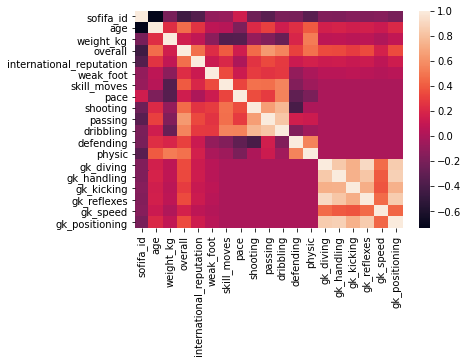

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
feature_columns = ['pace', 'defending', 'passing', 'shooting', 'dribbling', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_diving' ,'gk_positioning']

In [ ]:
X = df[feature_columns].to_numpy()
X

array([[87.        , 39.        , 92.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [90.        , 35.        , 82.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [91.        , 32.        , 87.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       ...,
       [54.        , 48.        , 44.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [59.        , 45.        , 47.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [60.        , 47.        , 51.        , ..., 37.79862475,
        65.42239686, 63.37475442]])

In [ ]:
y = df['overall'].to_numpy().reshape(-1,1)
y.shape

(18278, 1)

In [ ]:
y

array([[94],
       [93],
       [92],
       ...,
       [48],
       [48],
       [48]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=42)


In [ ]:
X_train

array([[61.        , 60.        , 63.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [64.        , 30.        , 57.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [68.        , 64.        , 74.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       ...,
       [67.7008989 , 51.55350326, 57.23377663, ..., 34.        ,
        74.        , 74.        ],
       [65.        , 32.        , 58.        , ..., 37.79862475,
        65.42239686, 63.37475442],
       [61.        , 38.        , 44.        , ..., 37.79862475,
        65.42239686, 63.37475442]])

In [ ]:
y_train

array([[66],
       [72],
       [74],
       ...,
       [70],
       [78],
       [59]])

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
predict = xgb_model.predict(X_test)
predict

array([62.081764, 73.201744, 69.09789 , ..., 77.271545, 70.427956,
       71.49799 ], dtype=float32)

In [ ]:
xgb_model.score(X_train,y_train) * 100

95.38542191420824

In [ ]:
xgb_model.score(X_test,y_test) *100

95.35352597649597

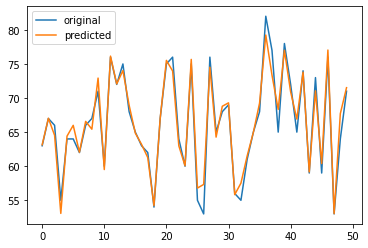

In [ ]:
plt.plot(y_test[3450:3500], label='original')
plt.plot(predict[3450:3500], label='predicted')
plt.legend()
plt.show()